# Neural Networks Tasks

## Task 1. Implement a Perceptron from Scratch

**Problem:** Creating a Perceptron Model for XOR Classification

**Task:** Develop a simple perceptron model using Python and NumPy to perform binary classification on the XOR problem.

**Description:** The XOR problem involves classifying a set of input pairs `(x1, x2)` into two classes: 1 if the inputs are different (`0, 1` or `1, 0`), and 0 if the inputs are the same (`0, 0` or `1, 1`). A perceptron is a simple neural network model that can learn linear decision boundaries. In this task, you will create a perceptron, train it on the XOR dataset, and observe its classification performance.

**Steps:**
1. Implement a Perceptron class with methods for initialization, activation, prediction, and training.
2. Initialize the perceptron's weights and bias with random values.
3. Define the XOR dataset: input features and corresponding labels.
4. Use the perceptron's `train` method to update weights and bias using the perceptron learning rule.
5. Test the trained perceptron on the XOR dataset and print its predictions.

**Expected Output:**
For each input pair `(x1, x2)` in the XOR dataset, the perceptron should predict the corresponding class label (`0` or `1`). The final output should demonstrate the perceptron's ability to learn and classify the XOR problem.


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, hidden_size=3, output_size=1):
        """
        Initializes a simple perceptron model.
        Args:
            input_size (int): Number of input features.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(hidden_size)
        self.bias_output = np.random.rand(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_dx(self, x):
        return x * (1 - x)

    def mean_squared_error(self, y, predicted):
        return np.mean((y - predicted) ** 2)

    def train(self, X, y, epochs=1000, learning_rate=0.1, min_mse=0.001):

        """
        Trains the perceptron model on the given dataset using the perceptron learning rule.

        Args:
            X (ndarray): Input features of the dataset.
            y (ndarray): Ground truth labels of the dataset.
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for weight update.
        """
        for epoch in range(epochs):
            # Пряме розповсюдження
            # Forward propagation
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            output_layer_output = self.sigmoid(output_layer_input)


            # Error
            error = y - output_layer_output
            MSE = self.mean_squared_error(y, output_layer_output)
            if MSE <= min_mse:
                print(f"Epoch {epoch+1}/{epochs}, MSE: {MSE}")
                break

            # Backpropagation
            d_output = error * self.sigmoid_dx(output_layer_output)
            error_hidden = d_output.dot(self.weights_hidden_output.T)
            d_hidden = error_hidden * self.sigmoid_dx(hidden_layer_output)

            # Updating weights and biases
            self.weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
            self.bias_output += np.sum(d_output, axis=0) * learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
            self.bias_hidden += np.sum(d_hidden, axis=0) * learning_rate


    def predict(self, X):

        """
        Predicts the output label using the perceptron model.

        Args:
            x (ndarray): Input features.

        Returns:
            int: Predicted label (1 or 0).
        """
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output_layer_output = self.sigmoid(output_layer_input)
        return output_layer_output


if __name__ == "__main__":
    # XOR dataset: Input features and corresponding labels
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create and train the perceptron model
    model = Perceptron(input_size=2)
    model.train(X, y, epochs=100000, learning_rate=0.1)

    # Test the trained model
    test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = model.predict(test_input)
  # Convert the predictions to binary labels (0 or 1)
    binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

    print("Predictions:")
    for i in range(len(test_input)):
        predicted =float(predictions[i].item())
        binary_predicted = binary_predictions[i]
        MSE = model.mean_squared_error(y[i], predicted)
        print(f"Input: {test_input[i]}, Expect: {y[i]} "
              f"Predictions: [{binary_predicted}] ({predicted:.3f} , "
              f"MSE: {MSE:.5f})".format(6))





Epoch 18328/100000, MSE: 0.0009999609405490306
Predictions:
Input: [0 0], Expect: [0] Predictions: [0] (0.036 , MSE: 0.00130)
Input: [0 1], Expect: [1] Predictions: [1] (0.970 , MSE: 0.00089)
Input: [1 0], Expect: [1] Predictions: [1] (0.970 , MSE: 0.00089)
Input: [1 1], Expect: [0] Predictions: [0] (0.030 , MSE: 0.00092)


# Пояснення
Зроблено два варіанти перцептрона для XOR.

Код зверху - перцептрон із зворонім навчанням, та функціею активації сигмоїда. Навчання моделі зупиняється при досягненні min_MSE<=0.001


Нижче - запрограмовано персцептрон для XOR із наперед визначеними вагами та пороговою функцією активації


Perceptron_XOR_task_v2.svg


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self):
        self.w1 = np.array([-1, 1, 1])
        self.w2 = np.array([1, -1, 1])
        self.w3 = np.array([2, 2, -1])

    def activation(self, x):
        return 0 if x <= 0 else 1

    def predict(self, X):
        x = np.array(X)
        w_hidden1 = x[0] * self.w1
        w_hidden2 = x[1] * self.w2
        layer_hidden = np.stack(w_hidden1 + w_hidden2)

        layer_hidden_activation = np.array([self.activation(x) for x in layer_hidden])
        layer_out = layer_hidden_activation.dot(self.w3)
        layer_out_activation = self.activation(layer_out)

        return layer_out_activation

if __name__ == '__main__':
    perceptron = Perceptron()
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])

    print(f"for X =", *X)
    print(f"\nExpected [0, 1, 1, 0]: \nGot      {[perceptron.predict(x) for x in X]}")



for X = [0 0] [0 1] [1 0] [1 1]

Expected [0, 1, 1, 0]: 
Got      [0, 1, 1, 0]


## Task 2. Creating a visualization of common activation functions (sigmoid, ReLU, and tanh) using Python and Matplotlib

**Problem:** Activation Function Visualization

**Task:** Create a Visualization of Common Activation Functions

**Description:** Activation functions are crucial components in neural networks that introduce non-linearity and enable the network to learn complex patterns. This task involves visualizing the behavior of common activation functions: sigmoid, ReLU (Rectified Linear Unit), and tanh (hyperbolic tangent). By plotting their graphs, you will gain insights into how they transform input values.

**Steps:**
1. Implement the activation functions `sigmoid`, `relu`, and `tanh`.
2. Generate a range of input values for plotting.
3. Calculate the output values for each activation function using the provided input range.
4. Use Matplotlib to create a plot that shows the graphs of all three activation functions on the same plot.
5. Add labels, title, and legend to the plot to make it informative.

**Expected Output:**
A single plot should display the graphs of the sigmoid, ReLU, and tanh activation functions. The x-axis should represent the input values, and the y-axis should represent the output values. Each activation function's graph should have a distinctive shape that showcases its unique characteristics.

**Tips:**
- Sigmoid: S-shaped curve that maps input values to a range between 0 and 1.
- ReLU: Linear for positive values and zero for negative values, creating a hinge-like shape.
- tanh: S-shaped curve that maps input values to a range between -1 and 1.

**Learning Objectives:**
This task will help you understand the effects of different activation functions on input data transformation. You'll observe how these functions introduce non-linearity, saturate, or allow only positive outputs, which are essential aspects of neural network behavior.

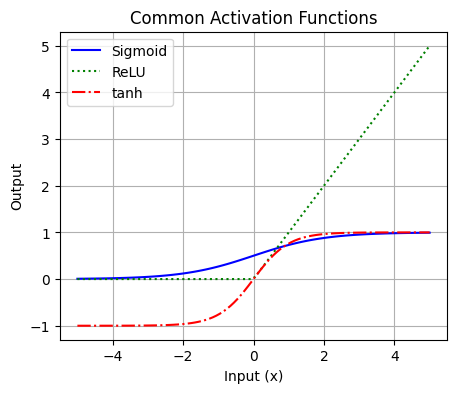

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """
    Sigmoid activation function.
    Args:         x (float): Input value.
    Returns:         float: Output of the sigmoid function.
    """
    return 1 / (1 + np.exp(-x))

def relu(x):
    """
    Rectified Linear Unit (ReLU) activation function.
    Args:         x (float): Input value.
    Returns:         float: Output of the ReLU function.
    """
    return np.maximum(0, x)

def tanh(x):
    """
    Hyperbolic tangent (tanh) activation function.
    Args:         x (float): Input value.
    Returns:        float: Output of the tanh function.
    """
    return np.tanh(x)

# Create x values for plotting
# x = np.arange(-5, 5, 0.1)
x = np.linspace(-5, 5, 100)

# Calculate y values for each activation function
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)


# Plot the activation functions
plt.figure(figsize=(5, 4))
plt.plot(x, y_sigmoid, label='Sigmoid', linestyle='-', color='b')
plt.plot(x, y_relu, label='ReLU', linestyle=':', color='g')
plt.plot(x, y_tanh, label='tanh', linestyle='-.', color='r')

# Add labels and title
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Common Activation Functions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




## Task 3. Hyperparameter Tuning

**Problem:** Hyperparameter Tuning for Neural Network

**Task:** Experiment with Different Hyperparameters to Optimize Neural Network Performance

**Description:** Hyperparameters are crucial settings that impact the performance of neural network models. This task involves exploring the effects of different hyperparameters, such as learning rate and number of hidden units, on the performance of a neural network model. By conducting experiments with various hyperparameter values, you will gain insights into how these settings influence the training process and final results.

**Steps:**
1. Implement a function to create a neural network model with a specified number of hidden units.
2. Implement a function to train the neural network model on the provided training data.
3. Define the hyperparameters to experiment with: learning rates and hidden units.
4. Loop through different combinations of hyperparameters and perform the following:
   - Create a new neural network model with the specified hyperparameters.
   - Train the model using the training data and provided hyperparameters.
   - Print the results of each experiment, including learning rate, hidden units, and training performance.

**Expected Output:**
For each combination of hyperparameters, you will observe the learning process of the neural network as it trains on the provided data. The output will include training progress updates and performance metrics such as loss and accuracy.

**Tips:**
- Experiment with a range of learning rates (e.g., 0.001, 0.01, 0.1) and hidden units (e.g., 4, 8, 16).
- Observe how different learning rates affect convergence speed and final performance.
- Notice the impact of changing the number of hidden units on model complexity and overfitting.

**Learning Objectives:**
This task will help you understand the significance of hyperparameters in neural networks and their effects on model training and performance. You will gain hands-on experience in tuning hyperparameters and making informed decisions to optimize your neural network models.

_Note._ In code, we define two functions:

- `create_neural_network`: Creates a neural network model with a specified number of hidden units and compiles it using the Adam optimizer.
- `train_neural_network`: Trains the given neural network model on the provided training data.



In [ ]:
!pip install keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf

def create_neural_network(input_dim, hidden_units):
    """
    Create a neural network model with a specified number of hidden units.

    Args:
        input_dim (int): Number of input features.
        hidden_units (int): Number of units in the hidden layer.

    Returns:
        model (Sequential): Compiled neural network model.
    """

    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_dim, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression tasks
    model.compile(optimizer='adam', loss='mean_squared_error')  # You can change the optimizer and loss function as needed
    return model

def train_neural_network(model, X_train, y_train, num_epochs, batch_size):
    """
    Train the neural network model on the training data.

    Args:
        model (Sequential): Compiled neural network model.
        X_train (ndarray): Training input features.
        y_train (ndarray): Training labels.
        num_epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
    """
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
    return history

# Example data and labels
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

# Hyperparameters to experiment with
input_dim = X_train.shape[1]
learning_rates = [0.001, 0.01, 0.1]
hidden_units_list = [4, 8, 16, 3]
num_epochs = 50
batch_size = 2

# Perform hyperparameter tuning
for learning_rate in learning_rates:
    for hidden_units in hidden_units_list:
        model = create_neural_network(input_dim=input_dim, hidden_units=hidden_units)
        train_neural_network(model, X_train, y_train, num_epochs=num_epochs, batch_size=batch_size)

        # Evaluate the model's performance (you can replace this with your own evaluation metric)
        loss = model.evaluate(X_train, y_train)
        print("\n", "*" * 50)
        print(f"Learning Rate: {learning_rate}, Hidden Units: {hidden_units}, Loss: {loss}")
        for i in X_train:
          predictions = float(model.predict(np.array([i]), verbose=0))
          print(f"{i} predictions : {predictions:.2f}")


1/1 [==============================] - 0s 92ms/step - loss: 0.2615

 **************************************************
Learning Rate: 0.001, Hidden Units: 4, Loss: 0.2615415155887604
[0 0] predictions : 0.62
[0 1] predictions : 0.67
[1 0] predictions : 0.41
[1 1] predictions : 0.46
1/1 [==============================] - 0s 216ms/step - loss: 0.3032

 **************************************************
Learning Rate: 0.001, Hidden Units: 8, Loss: 0.3031928539276123
[0 0] predictions : 0.53
[0 1] predictions : 0.28
[1 0] predictions : 0.38
[1 1] predictions : 0.16
1/1 [==============================] - 0s 93ms/step - loss: 0.2543

 **************************************************
Learning Rate: 0.001, Hidden Units: 16, Loss: 0.2542857527732849
[0 0] predictions : 0.49
[0 1] predictions : 0.57
[1 0] predictions : 0.40
[1 1] predictions : 0.48
1/1 [==============================] - 0s 92ms/step - loss: 2.0159

 **************************************************
Learning Rate: 0.001, Hidd

# Пояснення
Попередні параметри видавали велику помилку

Щоб перевірити коректність створення моделі запустимо її із більшою кількістю епох.


In [ ]:
learning_rates = [0.1]
hidden_units_list = [3]
num_epochs = 20000
batch_size = 4

# Perform hyperparameter tuning
# model = create_neural_network(input_dim=input_dim, hidden_units=hidden_units)
train_neural_network(model, X_train, y_train, num_epochs=num_epochs, batch_size=batch_size)

# Evaluate the model's performance (you can replace this with your own evaluation metric)
loss = model.evaluate(X_train, y_train)
print("\n", "*" * 50)
print(f"Learning Rate: {learning_rate}, Hidden Units: {hidden_units}, Loss: {loss}")
for i in X_train:
    predictions = float(model.predict(np.array([i]), verbose=0))
    print(f"{i} predictions : {predictions:.2f}")

1/1 [==============================] - 0s 24ms/step - loss: 1.8077e-11

 **************************************************
Learning Rate: 0.1, Hidden Units: 3, Loss: 1.80766512869468e-11
[0 0] predictions : 0.00
[0 1] predictions : 1.00
[1 0] predictions : 1.00
[1 1] predictions : 0.00


## Task 4. Text Classification with Word Embeddings

**Problem:** Text Classification with Word Embeddings

**Task:** Train a Neural Network for Sentiment Analysis Using Word Embeddings

**Description:** Sentiment analysis is the process of determining the sentiment or emotional tone expressed in a piece of text. This task involves training a simple neural network to perform sentiment analysis on a dataset of text reviews. Word embeddings will be utilized to represent words in a dense vector space, capturing semantic relationships between words. The trained model will then predict whether a given text review has a positive or negative sentiment.

**Steps:**
1. Load and preprocess the dataset of text reviews and their corresponding sentiment labels (positive or negative).
2. Tokenize the text data to convert it into sequences of numerical values (word indices).
3. Pad the sequences to ensure uniform length for neural network input.
4. Build a neural network model with an embedding layer to learn word representations and a dense output layer for binary sentiment classification.
5. Train the model using the tokenized and padded text data, aiming to minimize the binary cross-entropy loss.
6. Evaluate the model's performance using evaluation metrics such as accuracy, precision, recall, and F1-score.

**Expected Output:**
A trained neural network model capable of predicting the sentiment (positive or negative) of text reviews. This model should be able to process new text reviews and classify their sentiments accurately.

**Tips:**
- Use a well-known dataset for sentiment analysis, such as IMDb movie reviews.
- Experiment with different hyperparameters like embedding dimension, number of hidden layers, and batch size.
- Visualize the training progress by plotting the loss and accuracy curves over epochs.

**Learning Objectives:**
By completing this task, you'll gain practical experience in natural language processing and sentiment analysis. You'll understand the importance of word embeddings in capturing semantic information from text and how neural networks can be effectively used for text classification tasks.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/SoftServe_DATAset/
!ls *.csv

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/SoftServe_DATAset
CyberBullying_Comments_Dataset.csv  features.csv  House_prices.csv  housing.csv


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy, Precision, Recall, F1Score
from keras.models import load_model

def prepare_data(texts, labels, max_words):
    texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
    labels_train = labels_train.astype('float32')
    labels_test = labels_test.astype('float32')

    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(texts_train)
    sequences_train = tokenizer.texts_to_sequences(texts_train)
    sequences_test = tokenizer.texts_to_sequences(texts_test)

    max_sequence_length = max(len(sequences_train), len(sequences_test))
    sequences_train = pad_sequences(sequences_train, maxlen=max_sequence_length, padding='post').astype('float32')
    sequences_test = pad_sequences(sequences_test, maxlen=max_sequence_length, padding='post').astype('float32')

    return sequences_train, labels_train, sequences_test, labels_test

def create_model(max_words, embedding_dim, max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=BinaryCrossentropy(),
                  metrics=[BinaryAccuracy(), Precision(), Recall(), F1Score(),
                          ])
    return model

def train_model(model, sequences_train, labels_train,  file_model, num_epochs=1, batch_size=64):
    model.fit(sequences_train, labels_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
    # Save the trained model
    model.save(file_model)

def evaluate_model(model, sequences_test, labels_test):
    # Evaluation of the model
    evaluation = model.evaluate(sequences_test, labels_test)
    print("Test Accuracy:", evaluation[1])
    print("Test Precision:", evaluation[2])
    print("Test Recall:", evaluation[3])
    print("Test F1 Score:", evaluation[4])


def run_train_sentiment_analysis_model(texts, labels, file_model, max_words, embedding_dim, num_epochs, batch_size):

    sequences_train, labels_train, sequences_test, labels_test = prepare_data(texts, labels, max_words)
    model = create_model(max_words, embedding_dim, len(sequences_train[0]))
    train_model(model, sequences_train, labels_train, file_model, num_epochs, batch_size)
    evaluate_model(model, sequences_test, labels_test)


# Hyperparameters
max_words = 10000  # Максимальна кількість слів у словнику
embedding_dim = 100  # Розмірність вбудовування слів
num_epochs = 1  #
batch_size = 32

# Load the data from the CSV file
data = pd.read_csv("CyberBullying_Comments_Dataset.csv")
texts = data["Text"]
labels = data["CB_Label"]
file_model = "CyberBullying_model_5.keras"
model = run_train_sentiment_analysis_model(texts, labels, file_model, max_words, embedding_dim, num_epochs, batch_size)


70/70 [==============================] - 5s 69ms/step - loss: 0.5225 - binary_accuracy: 0.7532 - precision_1: 0.7982 - recall_1: 0.6667 - f1_score: 0.6594
Test Accuracy: 0.7531531453132629
Test Precision: 0.7982456088066101
Test Recall: 0.6666666865348816
Test F1 Score: [0.6594203]


# Пояснення
Модель навчили та вивантажили у файл "CyberBullying_model_5.keras"


Далі завантажуємо навчену модель та візуально перевіряємо на тестових даних




In [ ]:
!ls *.keras

CyberBullying_model_5.keras


In [ ]:
# Load model file
loaded_model = load_model(file_model)

sequences_train, labels_train, sequences_test, labels_test = prepare_data(texts, labels, max_words)
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Predictions using the loaded model
predictions = loaded_model.predict(sequences_test)

# Convert the predictions to binary labels (0 or 1)
binary_labels = (predictions > 0.5).astype(int)

# Print the predicted sentiments for new text reviews
for i, text in enumerate(texts_test):
    sentiment = "Positive" if binary_labels[i] == 0 else "Negative"
    expected = "Positive" if labels_test.iloc[i] == 0 else "Negative"
    print(f"Review: {text}\nSentiment: {sentiment}\nExpected: {labels_test.iloc[i]} {expected}\n")

Выходные данные были обрезаны до нескольких последних строк (5000).
Review: yo freak "sarath freak"
Sentiment: Positive
Expected: 1 Negative

Review: plz dont even talk about getting fat i put on @ LEAST 15 lbs its delishhhhh mad chocolate TO THE DOME
Sentiment: Positive
Expected: 0 Positive

Review: Coat Rack Contest in the Fab Lab. I hate winter  but this would help channel emotions into something constructive.
Sentiment: Positive
Expected: 1 Negative

Review: i hate "the line." i also hate the loud "WHEEL OF FORTUNE" sound bc that usually indicates a spin and EVERYBODY rushes over. nosy.
Sentiment: Positive
Expected: 0 Positive

Review: Don't ya just hate it when work gets in the way of eating?
Sentiment: Positive
Expected: 0 Positive

Review: "Why is manber such a shit rapper?"
Sentiment: Negative
Expected: 1 Negative

Review: "u look like a damn fool"
Sentiment: Negative
Expected: 1 Negative

Review: Damn I don't think I'm on the list
Sentiment: Positive
Expected: 0 Positive

Revi